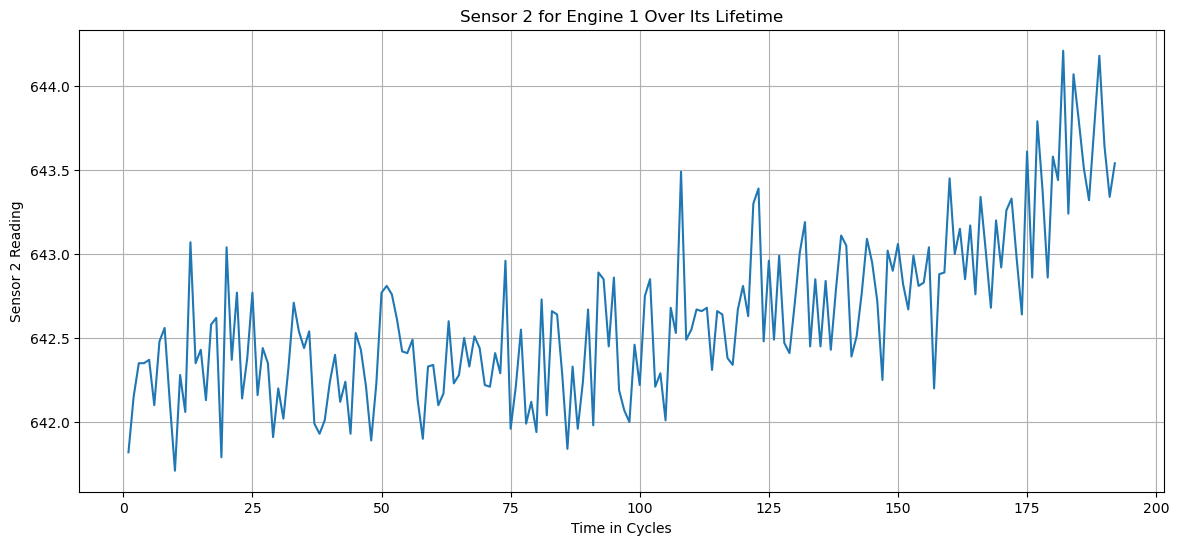

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading data#
df = pd.read_csv('train_FD001.txt', sep=' ', header = None)

#Displays the first 5 heads#
#df.head()

#Cleaning the data by removing the last two columns#
df.dropna(axis=1, inplace = True)
#df.head()

# Define the column names
column_names = ['unit_number', 'time_in_cycles', 'op_setting_1', 'op_setting_2', 'op_setting_3'] + [f'sensor_{i}' for i in range(1, 22)]

# Assign the names to the dataframe
df.columns = column_names
df.head()

#--plotting--#
#Creating a new data frame for only engine 1#
engine_1_df = df[df['unit_number']==1]

#plot set up#
plt.figure(figsize=(14,6))

#plot data#
plt.plot(engine_1_df['time_in_cycles'],engine_1_df['sensor_2'])

# Add labels and title for clarity
plt.xlabel('Time in Cycles')
plt.ylabel('Sensor 2 Reading')
plt.title('Sensor 2 for Engine 1 Over Its Lifetime')
plt.grid(True)
plt.show()

In [4]:
#Calculate the max cycle for each engine#
max_cycle = df.groupby('unit_number')['time_in_cycles'].transform('max')

#Calculate the Remaining Useful Life (RUL) for each row#
df['RUL'] = max_cycle - df['time_in_cycles']

# Display the first 5 rows#
df.head()

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [5]:
# Define our warning window in cycles#
warning_window = 30

# Create the new label column.#
# This line checks if RUL is less than or equal to 30, which gives True/False,#
# then .astype(int) converts True to 1 and False to 0.#
df['is_nearing_failure'] = (df['RUL'] <= warning_window).astype(int)

# Display the last 5 rows of the dataframe to see the result#
df.tail()

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL,is_nearing_failure
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4,1
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3,1
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2,1
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1,1
20630,100,200,-0.0032,-0.0005,100.0,518.67,643.85,1600.38,1432.14,14.62,...,8137.33,8.5036,0.03,396,2388,100.0,38.37,23.0522,0,1


In [6]:
#Last 35 rows of engine 1#
df[df['unit_number'] ==1].tail(35)

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL,is_nearing_failure
157,1,158,-0.0023,0.0001,100.0,518.67,642.88,1596.82,1410.09,14.62,...,8126.33,8.4368,0.03,394,2388,100.0,38.75,23.2894,34,0
158,1,159,-0.0006,0.0001,100.0,518.67,642.89,1589.54,1420.37,14.62,...,8127.61,8.4403,0.03,394,2388,100.0,38.76,23.2530,33,0
159,1,160,-0.0006,-0.0004,100.0,518.67,643.45,1590.65,1418.08,14.62,...,8122.68,8.4433,0.03,396,2388,100.0,38.52,23.2817,32,0
160,1,161,0.0008,0.0001,100.0,518.67,643.00,1594.20,1417.31,14.62,...,8126.97,8.4405,0.03,394,2388,100.0,38.66,23.2962,31,0
161,1,162,-0.0005,0.0004,100.0,518.67,643.15,1592.22,1423.48,14.62,...,8123.77,8.5015,0.03,394,2388,100.0,38.78,23.1538,30,1
162,1,163,0.0003,-0.0004,100.0,518.67,642.85,1600.54,1421.09,14.62,...,8124.06,8.5129,0.03,393,2388,100.0,38.65,23.1419,29,1
163,1,164,0.0005,-0.0002,100.0,518.67,643.17,1598.96,1416.76,14.62,...,8124.63,8.4803,0.03,394,2388,100.0,38.62,23.1761,28,1
164,1,165,0.0010,0.0004,100.0,518.67,642.76,1597.03,1408.09,14.62,...,8126.53,8.4922,0.03,393,2388,100.0,38.59,23.2129,27,1
165,1,166,-0.0022,-0.0003,100.0,518.67,643.34,1596.72,1422.37,14.62,...,8119.14,8.4663,0.03,395,2388,100.0,38.62,23.1450,26,1
166,1,167,0.0012,0.0003,100.0,518.67,643.02,1593.83,1414.72,14.62,...,8122.41,8.4632,0.03,394,2388,100.0,38.77,23.3011,25,1
